# Krigging

In [1]:
from all_imports import *

import _modules

%matplotlib inline
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

from pykrige.rk import RegressionKriging
import datetime as dt

 ### test init### 


## Weather Data Analysis

In [4]:
#Combine all Weather files
def LoadWeatherStationDataIntoDf(item: str, dirs: List[str] = []) -> pd.DataFrame:

    #get all unique files
    #add them together first individually
    #then concat all of them

    df_list = []
    for file_dir in dirs:
        filepaths, filenames = _modules.find_files_in_directory(file_dir, 'csv')
        
        for weather_file in filepaths:
            #print(weather_file)
            filename = os.path.basename(weather_file)
            station_name = filename.split('_')[1]
            df = pd.read_csv(weather_file)
            df = df[['Datetime', item]]
            df.rename(columns={item: f"{station_name}_{item}"}, inplace=True)

            df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%dT%H:%M:%S')
            df = df.drop_duplicates('Datetime') #Sure?
            df.set_index('Datetime', inplace=True)
            
            df_list.append(df)

    combined_df = pd.concat(df_list, axis=1, join='outer')
    combined_df = combined_df.groupby(combined_df.columns, axis=1).first()
    return combined_df


dirs = [r'C:\Users\gottk\OneDrive\Storage\Projects\2024-08-00_MTHCOM_Masterthesis-Outdoor-Comfort\WeatherData\202402\EveryMinute',
        r'C:\Users\gottk\OneDrive\Storage\Projects\2024-08-00_MTHCOM_Masterthesis-Outdoor-Comfort\WeatherData\202403\EveryMinute']

WS_Temp_df = LoadWeatherStationDataIntoDf('AirTemp Ave (C)', dirs)
WS_relH_df = LoadWeatherStationDataIntoDf('AirTemp Ave (C)', dirs)
# display(WS_Temp_df)
# pprint(WS_Temp_df.columns)

start_date = '2024-02-20'
end_date = '2024-03-15'
WS_Temp_filtered_df = WS_Temp_df.loc[start_date:end_date]

display(WS_Temp_filtered_df.columns)


C:\Users\gottk\AppData\Local\Temp\ipykernel_40920\3400717596.py:27: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  combined_df = combined_df.groupby(combined_df.columns, axis=1).first()
C:\Users\gottk\AppData\Local\Temp\ipykernel_40920\3400717596.py:27: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  combined_df = combined_df.groupby(combined_df.columns, axis=1).first()


Index(['WS03_AirTemp Ave (C)', 'WS06_AirTemp Ave (C)', 'WS09_AirTemp Ave (C)',
       'WS13_AirTemp Ave (C)', 'WS14_AirTemp Ave (C)', 'WS16_AirTemp Ave (C)',
       'WS17_AirTemp Ave (C)', 'WS18_AirTemp Ave (C)', 'WS24_AirTemp Ave (C)',
       'WS25_AirTemp Ave (C)', 'WS29_AirTemp Ave (C)', 'WS31_AirTemp Ave (C)',
       'WS32_AirTemp Ave (C)', 'WS33_AirTemp Ave (C)', 'WS36_AirTemp Ave (C)',
       'WS37_AirTemp Ave (C)', 'WS39_AirTemp Ave (C)', 'WS42_AirTemp Ave (C)',
       'WS43_AirTemp Ave (C)', 'WS44_AirTemp Ave (C)', 'WS47_AirTemp Ave (C)',
       'WS48_AirTemp Ave (C)', 'WS50_AirTemp Ave (C)', 'WS56_AirTemp Ave (C)',
       'WS57_AirTemp Ave (C)', 'WS60_AirTemp Ave (C)', 'WS61_AirTemp Ave (C)',
       'WS62_AirTemp Ave (C)', 'WS65_AirTemp Ave (C)', 'WS67_AirTemp Ave (C)',
       'WS68_AirTemp Ave (C)', 'WS69_AirTemp Ave (C)', 'WS72_AirTemp Ave (C)',
       'WS73_AirTemp Ave (C)', 'WS74_AirTemp Ave (C)', 'WS75_AirTemp Ave (C)',
       'WS76_AirTemp Ave (C)'],
      dtype='object'

<Axes: xlabel='Datetime'>

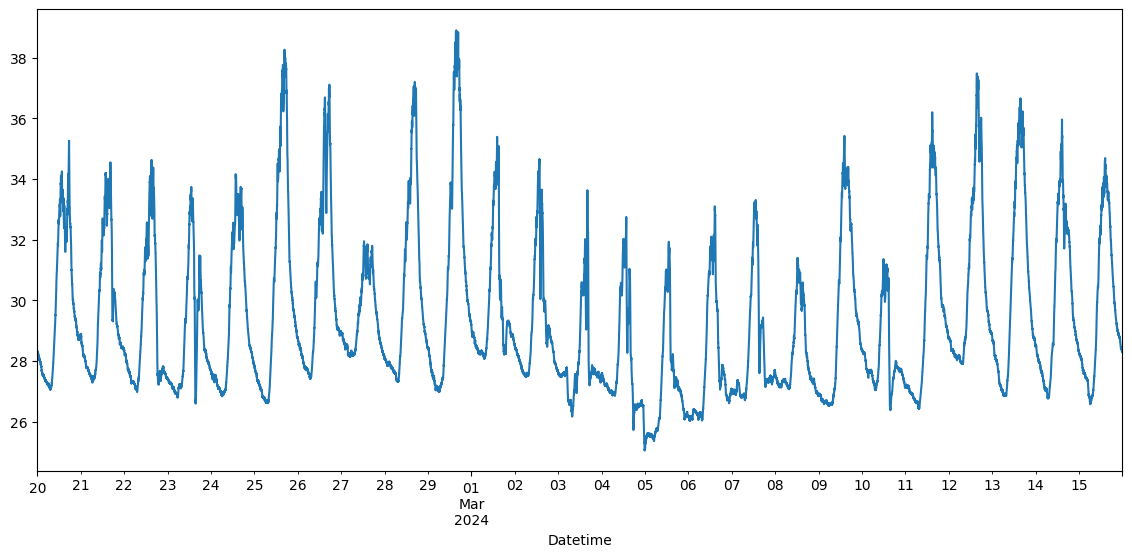

In [8]:
# Minutly Weather data plot for the selected timeframe

#accumulate the averages of the tmeprature points by time, not all minute points
#show an average max and min line with the sacttered points
WS_Temp_filtered_df['WS03_AirTemp Ave (C)'].plot(figsize=(14, 6))

What do i need?

A Boxplot for each weather station, average, time of the day (night and day) and a linechart for the temperature path during the study
-- > this for each weatherstation as a layout plot

plot per average minute values, mazbe cluster the differnte stations based on environment

In [ ]:
WS_Temp_df_days = WS_Temp_df.resample('D').mean()
WS_Temp_df_days[['WS03_AirTemp Ave (C)', 'WS09_AirTemp Ave (C)']].plot(kind='line', figsize=(14, 6))
WS_Temp_df_days.plot(kind='line', figsize=(14, 6))

In [ ]:
# Weather Analsis similar 
average_temp = WS_Temp_df_days.mean(axis=1)
min_temp = WS_Temp_df_days.min(axis=1)
max_temp = WS_Temp_df_days.max(axis=1)

# Plotting
plt.figure(figsize=(14, 6))

# Plot shaded area between min and max temperatures
plt.fill_between(WS_Temp_df_days.index, min_temp, max_temp, color='lightgrey', alpha=0.5)

# Plot average temperature as a red line
plt.plot(WS_Temp_df_days.index, average_temp, color='red', linewidth=2, label='Average Temperature')

# Set title and labels
plt.title('Average, Min, and Max Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()

# Customize grid and ticks
plt.grid(True, linestyle='--', alpha=0.8)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
WS_Temp_df

In [ ]:
# Filter data for the specific date range
start_date = '2024-02-20'
end_date = '2024-03-15'
filtered_df = WS_Temp_df.loc[start_date:end_date]

# Resample the data to daily intervals
WS_Temp_df_daily = filtered_df.resample('D').mean()

# Reset index to have 'Datetime' as a column for easier manipulation
WS_Temp_df_daily.reset_index(inplace=True)

# Melt the dataframe to long format for seaborn
WS_Temp_long = WS_Temp_df_daily.melt(id_vars=['Datetime'], var_name='Station', value_name='Temperature')

# Extract day from Datetime for plotting
WS_Temp_long['Day'] = WS_Temp_long['Datetime'].dt.date

# Plot the data
plt.figure(figsize=(15, 8))
sns.violinplot(x='Day', y='Temperature', data=WS_Temp_long, inner='box', color='red')
plt.xticks(rotation=90)
plt.title('Daily Temperature Distribution (20.02.2024 - 15.03.2024)')
plt.xlabel('Day')
plt.ylabel('Temperature (C)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = sns.load_dataset("titanic")

sns.violinplot(data=df, x="class", y="age", hue="alive", split=True, gap=.1, inner="box")


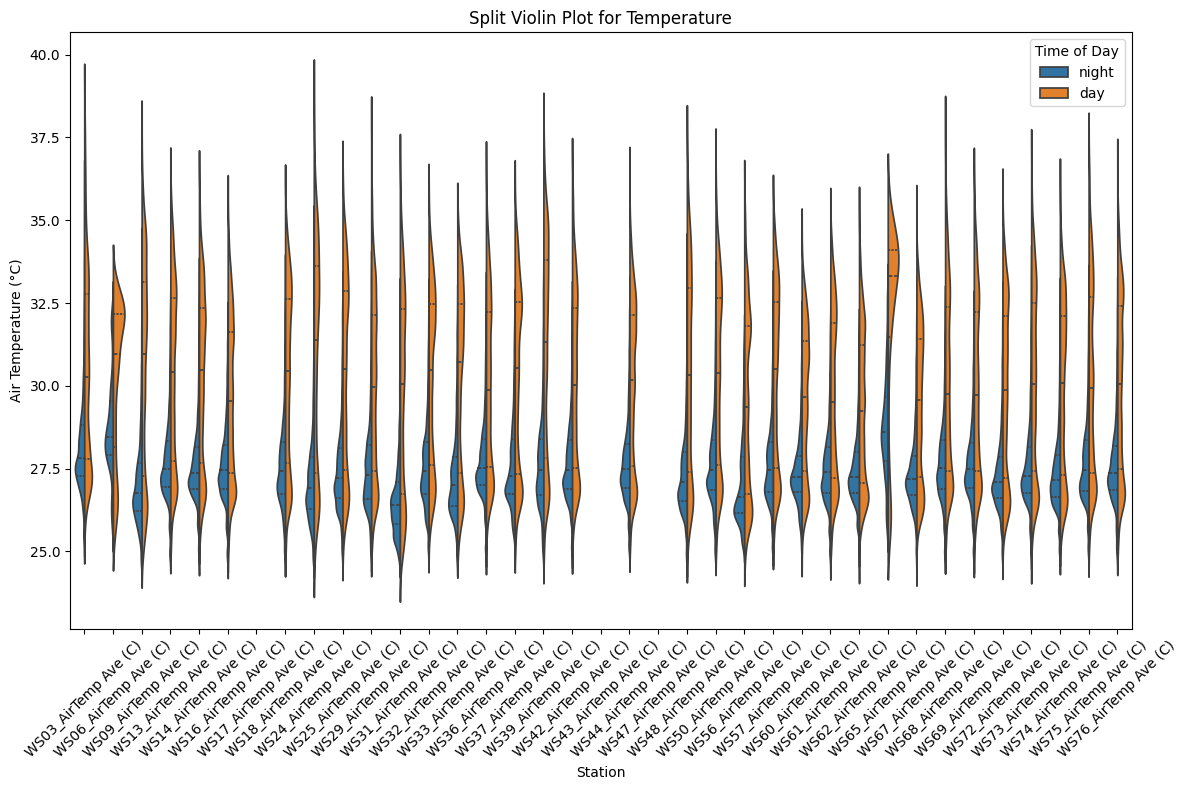

In [4]:
# Filter data by date range
start_date = '2024-02-20'
end_date = '2024-03-15'

WS_Temp_filtered = WS_Temp_df.loc[start_date:end_date]
WS_relH_filtered = WS_relH_df.loc[start_date:end_date]

# Melt the DataFrames to long format
WS_Temp_melted = WS_Temp_filtered.reset_index().melt(id_vars='Datetime', var_name='Station', value_name='AirTemp Ave (C)')

# Extract 'day' and 'night' based on Datetime (assuming day is 6am to 6pm)
WS_Temp_melted['Time of Day'] = WS_Temp_melted['Datetime'].apply(lambda x: 'day' if 6 <= x.hour < 18 else 'night')

# Plotting split violin plot for Temperature
plt.figure(figsize=(12, 8))
sns.violinplot(data=WS_Temp_melted, x='Station', y='AirTemp Ave (C)', hue='Time of Day', split=True, inner="quartile")
plt.title('Split Violin Plot for Temperature')
plt.xlabel('Station')
plt.ylabel('Air Temperature (°C)')
plt.legend(title='Time of Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Regression Kriging


In [ ]:
#TODO!
#analyse the weather station data
#How to do the krigign, check the gps data, what are the time differences


#Get the participant Data local and filter out the relevenat dates and times by 5min increments?
#Create a plot, how much time on average on runs between Locations points, this is the base fro the interpolation
#Combine all weather data into one df
#Take from the pool the relevant data and create the waetherdatafiles for the regression
#Analysie the temperatrue data in a linechart plot


# Directory Definitions
parent_dir: str = 'C:/Users/gottk/OneDrive/GITHUB/calma-esse-heat-stress-internal/Esse/data/krigging/'
dirWH: str = os.path.join(parent_dir, 'Weatherdata')
dirOut: str = r'Esse\report\krigging_output'

# File Definitions
griddf    = pd.read_csv(parent_dir + '5mGrid_features_original.csv').fillna(0)
wsdf      = pd.read_csv(parent_dir + 'WS_features.csv').fillna(0)

# plttitle = 'RegressionKriging'
today = dt.datetime.now().strftime("%m%d%y-%H%M")
print(today)


#Load Files and make a feature selection
#Feature selection
terrain_features  = ['Ter_height']
sky_features      = ['Sun_h', 'Bld_SkyEx', 'Veg_SkyEx']
bld_features      = ['Bld_percent', 'Bld_height']
veg_features      = ['Veg_height', 'Veg_percent']
distance_features = ['distToBuilding', 'distToTree', 'distToWalkway', 'distToRoad',  'distToPath', 'distToCourtTrack', 'distToCarpark']

features = distance_features + sky_features   + veg_features  + bld_features + terrain_features

display(griddf.head())
display(wsdf.head())
print(features)

### Get the Weather Data to interpolate
This loads the feature data.
Currently Available:


1. 'Tavg' Temperature
2. 'Radavg" Radiation (not yet)
3. 'Havg' Humidity (not yet)
4. 'Wsavg' Windspeed (not yet)
5. 'Wdavg' Winddirection (not yet)



In [ ]:
### Specify temperature measure to use
measure = "TAvg" # options: ['Tmax','Tavg']

### Read and prepare weather data
df = pd.read_csv(dirWH + '/' + measure +'.csv')
df = df.merge(wsdf[["X","Y",'ID']], on='ID', how='left')

### Get min and max value for plotting graph
minval = df.drop(columns=['ID','Lat','Long','X','Y']).min(numeric_only=True).min()
maxval = df.drop(columns=['ID','Lat','Long','X','Y']).max(numeric_only=True).max()
print("Min: ", minval, "Max: ",maxval)

display(df)

### Clustering

In [ ]:
metadatadf = griddf.copy()

# Quantization function
def quantize_column(column, step_size):
    return round(column / step_size) * step_size

# Number of steps for quantization
num_steps = 3

feature_list = ['Bld_percent', 'distToBuilding', 'Bld_height', 'Veg_height', 'distToTree']


# Determine step sizes for each column and apply quantization
for col in feature_list:
    step_size = metadatadf[col].max() / num_steps
    metadatadf[f'quantized_{col}'] = metadatadf[col].apply(quantize_column, args=(step_size,))

# Standard scaling
scaler = StandardScaler()
metadatadf[feature_list] = scaler.fit_transform(metadatadf[feature_list])

# KMeans clustering
n_clusters = 10
metadatadf['cluster'] = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0).fit_predict(metadatadf[feature_list])

# Plot the clustered data
plt.scatter(metadatadf['X'], metadatadf['Y'], c=metadatadf['cluster'], cmap='rainbow', s=1, marker='s')
plt.title('Clustered Data')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.colorbar(label='Cluster')
plt.show()
#-------------------------------------------------------------------------------------------------
# DBSCAN clustering
X = metadatadf[['cluster', 'X', 'Y']] #features for DBclustering
X_scaled = StandardScaler().fit_transform(X)

eps = 0.35
min_samples = 250
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
metadatadf['cluster'] = dbscan.fit_predict(X_scaled)

# Visualize the DBSCAN clustering
plt.scatter(metadatadf['X'], metadatadf['Y'], c=metadatadf['cluster'], cmap='hsv', s=1, marker='s')
plt.colorbar(label='Cluster')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#-------------------------------------------------------------------------------------------------
#downsampling and upscaling again
# Group by the cluster column
metadata_df_grp = metadatadf.groupby('cluster')

# Define a function to sample a specific percentage from each group
def downsample_group(group):
    return group.sample(frac=0.25)  # You can adjust the fraction as needed

# Apply the downsampling function to each group
downsampled_df = metadata_df_grp.apply(downsample_group)

# Reset the index of the downsampled DataFrame
downsampled_df.reset_index(drop=True, inplace=True)

plt.scatter(downsampled_df['X'], downsampled_df['Y'], c=downsampled_df['cluster'], cmap='hsv', alpha=0.7,  s=5, marker='s')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Downsampled Scatter Plot')

# Add a colorbar to show the cluster information
colorbar = plt.colorbar()
colorbar.set_label('Cluster')

# Show the plot
plt.show()

# Fit Nearest Neighbors model on the downsampled data
nn_model = NearestNeighbors(n_neighbors=1).fit(downsampled_df[['X', 'Y']])

# Find the index of the nearest neighbor for each point in griddf
distances, indices = nn_model.kneighbors(griddf[['X', 'Y']])

# Map the cluster values from downsampled_df to griddf based on the nearest neighbors
griddf['cluster'] = downsampled_df.loc[indices.flatten()]['cluster'].values

plt.scatter(griddf['X'], griddf['Y'], c=griddf['cluster'], cmap='viridis', alpha=0.7,  s=1, marker='s')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot with Cluster Test')

# Add a colorbar to show the cluster information
colorbar = plt.colorbar()
colorbar.set_label('Cluster')

# Show the plot
plt.show()

#-------------------------------------------------------------------------------------------------
#Somehow smooth the data..



#-------------------------------------------------------------------------------------------------
#adjusting the considered features
quantized_cols = metadatadf.filter(like='quantized').columns
# griddf = metadatadf.drop(columns=quantized_cols) #.drop(columns=['cluster_x', 'cluster_y'])

features.append('cluster')

### get features for wsdf
# Calculating distances using sklearn's NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(griddf[['X', 'Y']])
distances, indices = nbrs.kneighbors(wsdf[['X', 'Y']])
# Add the index of the closest point in griddf to wsdf
wsdf['closest_index'] = indices.flatten()
# Retrieve specific columns from griddf based on closest_index and merge it with wsdf and only new selection features
merged_data = wsdf.join(griddf['cluster'], on='closest_index') #rsuffix='_griddf')
# Drop the redundant 'closest_index' column
wsdf = merged_data.drop(columns=['closest_index'])


# Print the updated list
print(features)

#display(griddf)


### Regression Kriging

In [ ]:
### Select features for model
p = wsdf[features]
target_p = griddf[features]
target_x = np.array(list(zip(griddf.X, griddf.Y)))

feature_importance_df = pd.DataFrame(features, columns =['FeatureName'])

### SVR model parameters
C = 0.0005
gamma = 5
kernel = ['linear'] # options: ['#linear', 'poly', 'rbf', 'sigmoid']

### RandomForestRegressor parameters
n_estimators=50
random_state=4

### RegressionKrigging parameters
n = 8
variogram_models = ['spherical'] # options: ["linear", "power", "gaussian", "spherical", "exponential"]

### List of month names
months = ["Feb-19"] # "Mar-19","Apr-19","May-19","Jun-19","Jul-19","Aug-19","Sep-19","Oct-19","Nov-19","Dec-19","Jan-20","Feb-20","Mar-20","Apr-20"


for k in variogram_models:
    model = RandomForestRegressor(n_estimators=15, random_state=random_state)

    scores_mths = []
    for mth in months:
        print(mth)

        x = np.array(list(zip(wsdf.X, wsdf.Y)))
        target = np.array(df[mth])

        print("=" * 40)
        m_rk = RegressionKriging(regression_model=model, n_closest_points=n, variogram_model=k, verbose=False)

        m_rk.fit(p, x, target)
        result = m_rk.predict(target_p, target_x)
        resultdf = griddf
        resultdf[measure] = result

        ### Plot map (uncomment and adjust vmin, vmax and ticks if needed)
        plt.figure(figsize=(10, 7))
        plt.scatter(resultdf['X'], resultdf['Y'], c=resultdf[measure], cmap='seismic', marker='s', s=1, vmin=minval, vmax=maxval)
        plt.title('Scatter plot of '+ measure +' (' + mth + ')')
        cbar = plt.colorbar()
        # ticks = [14.0,16.5,19.0,21.5,24.0,26.5,29.0,31.5]
        # cbar.set_ticks(ticks)
        # cbar.set_ticklabels(ticks)

        ### Print results to csv per month (uncomment to save csv and png)
        if not os.path.exists(dirOut + today):
          os.makedirs(dirOut + today)
        resultdf.to_csv(dirOut + today + '/' + measure + mth + '.csv')
        plt.savefig(dirOut + today + '/' + measure + mth + '.png', bbox_inches='tight')
        plt.show()

        ### Extract feature importances (uncomment to display feature importances)
        feature_importance_df[mth] = m_rk.regression_model.feature_importances_
        # featuredf = pd.DataFrame(list(zip(m_rk.regression_model.feature_names_in_, m_rk.regression_model.feature_importances_)), columns =['FeatureName', 'FeatureImportance'])
        # display(featuredf.sort_values(by=['FeatureImportance'], ascending=False))

### Feature Importance

In [ ]:
feature_importance_df = feature_importance_df.assign(mean=feature_importance_df.mean(axis=1))

feature_plotheatmap = feature_importance_df.sort_values(by=['mean'], ascending=False)
feature_plotheatmap = feature_plotheatmap.set_index('FeatureName')

plt.figure(figsize=(10, 6))
sns.heatmap(feature_plotheatmap, annot=True, cmap='coolwarm')
plt.title('Feature Importance Heatmap')
plt.xlabel('Models')
plt.ylabel('Features')
plt.show()

# plt.savefig(dirRP + today + '/' + 'FeatureMap' + '_' + measure + mth + '.png', bbox_inches='tight')

#select features based on threshhold
treshhold = 0.025
update_feature_selection = feature_plotheatmap[feature_plotheatmap['mean'] > treshhold].index.tolist()
print(update_feature_selection)